In [25]:
import os
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, ConfusionMatrixDisplay

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

In [26]:
random.seed(1)

data_dir = '../data/'

In [27]:
df = pd.read_csv(os.path.join(data_dir, 'combined.csv'))

df.head()

,Sample_ID,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,...,ENSG00000283907,ENSG00000283913,ENSG00000284032,ENSG00000284373,ENSG00000284387,ENSG00000284395,ENSG00000284505,ENSG00000284552,Disease,characteristics_ch1_bmi
0,GSM1501013,8.002176,0.175238,4.949994,3.285351,0.959516,0.672894,59.325067,4.168056,8.104327,...,3.031789,0.903138,1.222211,0.132392,0.491394,-0.079424,-0.255411,3.071849,normal control,27.1
1,GSM1501014,23.292853,-0.031148,5.657237,2.786927,1.203578,0.358625,46.002714,4.889903,7.588060,...,1.819534,-0.021741,0.487849,-0.066907,0.195198,0.178077,-0.190626,1.399320,healthy obese,30.5
2,GSM1501015,10.557890,0.097413,7.680354,2.795125,0.789783,0.733455,43.835288,5.133417,9.559194,...,1.914932,0.424076,0.423539,-0.155705,0.086307,0.230390,-0.489850,1.632879,normal control,25.3
3,GSM1501016,10.272135,0.066298,8.835539,3.166677,0.941032,0.755181,51.390227,4.168056,10.980774,...,1.313128,0.501803,0.357365,-0.321937,0.232894,-0.066718,-0.233382,2.117271,normal control,25.8
4,GSM1501017,8.290414,-0.039647,5.792685,2.203175,0.846344,0.612263,55.423440,3.657327,10.710821,...,4.507792,0.120017,0.452607,-0.263615,0.443599,0.291308,-0.474034,3.032463,normal control,23.5


In [28]:
le = LabelEncoder()

y = le.fit_transform(df['Disease'])

X = df.drop(columns = ['Sample_ID', 'Disease'])
X.head()

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000283787,ENSG00000283907,ENSG00000283913,ENSG00000284032,ENSG00000284373,ENSG00000284387,ENSG00000284395,ENSG00000284505,ENSG00000284552,characteristics_ch1_bmi
0,8.002176,0.175238,4.949994,3.285351,0.959516,0.672894,59.325067,4.168056,8.104327,3.010408,...,-0.246719,3.031789,0.903138,1.222211,0.132392,0.491394,-0.079424,-0.255411,3.071849,27.1
1,23.292853,-0.031148,5.657237,2.786927,1.203578,0.358625,46.002714,4.889903,7.588060,3.464364,...,0.040158,1.819534,-0.021741,0.487849,-0.066907,0.195198,0.178077,-0.190626,1.399320,30.5
2,10.557890,0.097413,7.680354,2.795125,0.789783,0.733455,43.835288,5.133417,9.559194,2.829070,...,-0.248596,1.914932,0.424076,0.423539,-0.155705,0.086307,0.230390,-0.489850,1.632879,25.3
3,10.272135,0.066298,8.835539,3.166677,0.941032,0.755181,51.390227,4.168056,10.980774,2.733645,...,-0.086860,1.313128,0.501803,0.357365,-0.321937,0.232894,-0.066718,-0.233382,2.117271,25.8
4,8.290414,-0.039647,5.792685,2.203175,0.846344,0.612263,55.423440,3.657327,10.710821,2.708227,...,0.337941,4.507792,0.120017,0.452607,-0.263615,0.443599,0.291308,-0.474034,3.032463,23.5


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

print(X_train.shape)
print(X_test.shape)

(106, 21662)
(27, 21662)


In [30]:
pipeline_steps = [
    ('scaler', StandardScaler()),
    ('classifier', SVC(class_weight='balanced')) 
]
pipeline = ImbPipeline(pipeline_steps)
print("\nDefined Pipeline:")
print(pipeline)


Defined Pipeline:
Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', SVC(class_weight='balanced'))])



Starting RandomizedSearchCV on Pipeline...
Fitting 5 folds for each of 30 candidates, totalling 150 fits


c:\Users\jaydn\Documents\Projects\Human-Liver-RNA-Seq-Gene-Expression-Analysis\venv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 30 is smaller than n_iter=50. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV on Pipeline complete.

Best hyperparameters found for the pipeline:
{'classifier__kernel': 'linear', 'classifier__C': np.float64(0.001)}

Best cross-validation score:
0.677573273287559

Best Pipeline Model:
Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 SVC(C=np.float64(0.001), class_weight='balanced',
                     kernel='linear'))])

--- Evaluation of Best Tuned Pipeline on Test Set ---
Accuracy: 0.6666666666666666

Classification Report:
                precision    recall  f1-score  support
healthy obese    0.500000  0.400000  0.444444      5.0
nafld            0.500000  0.200000  0.285714      5.0
nash             0.600000  0.750000  0.666667      4.0
normal control   0.700000  0.875000  0.777778      8.0
pbc              0.666667  1.000000  0.800000      2.0
psc              1.000000  1.000000  1.000000      3.0
macro avg        0.661111  0.704167  0.662434     27.0
weighted avg     0.641975  0.666667  0.63

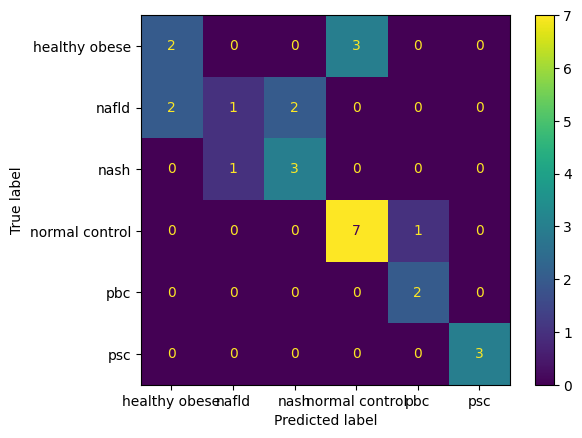

In [31]:
param_dist = [
    {
        'classifier__kernel': ['linear'],
        'classifier__C': np.logspace(-3, 3, 5),
    },
    
    {
        'classifier__kernel': ['rbf'],
        'classifier__C': np.logspace(-3, 3, 5),
        'classifier__gamma': np.logspace(-3, 3, 5),
    },
]

random_search_pipeline = RandomizedSearchCV(
    estimator=pipeline,                
    param_distributions=param_dist,  
    n_iter=50,                        
    cv=5,                            
    scoring='f1_weighted',             
    verbose=2,                   
    n_jobs=-1                          
)

print("\nStarting RandomizedSearchCV on Pipeline...")
random_search_pipeline.fit(X_train, y_train)
print("RandomizedSearchCV on Pipeline complete.")

print("\nBest hyperparameters found for the pipeline:")
print(random_search_pipeline.best_params_)

print("\nBest cross-validation score:")
print(random_search_pipeline.best_score_)

best_pipeline_model = random_search_pipeline.best_estimator_
print("\nBest Pipeline Model:")
print(best_pipeline_model)

y_pred_tuned = best_pipeline_model.predict(X_test)

print("\n--- Evaluation of Best Tuned Pipeline on Test Set ---")
svm_accuracy = accuracy_score(y_test, y_pred_tuned)
print(f"Accuracy: {svm_accuracy}")
print("\nClassification Report:")
svm_classfication_report = classification_report(y_test, y_pred_tuned, target_names=le.classes_, output_dict=True)
svm_classfication_report = pd.DataFrame(svm_classfication_report).transpose().drop('accuracy')
print(svm_classfication_report)

best_scaler = best_pipeline_model.named_steps['scaler']
best_classifier = best_pipeline_model.named_steps['classifier']

svm_conf_matrix = confusion_matrix(y_test, y_pred_tuned)
print("\nConfusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=svm_conf_matrix,
                              display_labels=le.classes_)
disp.plot()
plt.show()


--- Top 20 Most Relevant Features ---
               feature  importance
12489  ENSG00000171435    0.001362
18889  ENSG00000221818    0.001341
2972   ENSG00000105278    0.001303
19091  ENSG00000222721    0.001245
21046  ENSG00000261122    0.001230
8577   ENSG00000147082    0.001196
20911  ENSG00000255769    0.001189
20465  ENSG00000251704    0.001188
5803   ENSG00000128310    0.001178
14868  ENSG00000184378    0.001156
7779   ENSG00000141255    0.001155
15186  ENSG00000185873    0.001150
8020   ENSG00000143171    0.001141
14364  ENSG00000181958    0.001137
19837  ENSG00000237048    0.001127
16904  ENSG00000199713    0.001120
5270   ENSG00000124134    0.001114
19583  ENSG00000232307    0.001110
19485  ENSG00000229919    0.001109
16517  ENSG00000198203    0.001103


<Axes: xlabel='importance', ylabel='feature'>

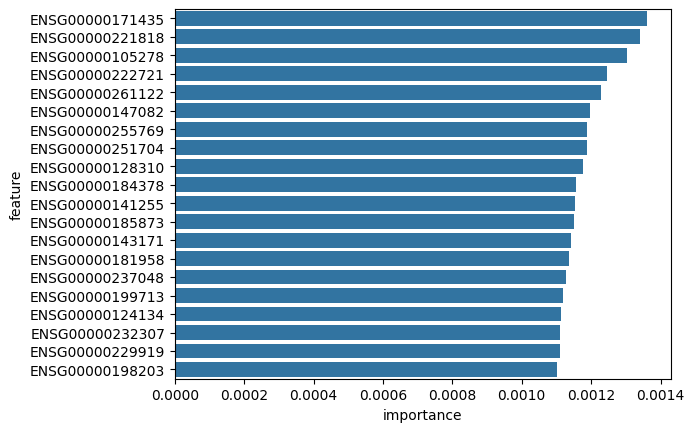

In [32]:
importances = np.abs(best_classifier.coef_[0])

feature_names = X_train.columns.tolist()

svm_feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

svm_feature_importance_df = svm_feature_importance_df.sort_values(by='importance', ascending=False)

print("\n--- Top 20 Most Relevant Features ---")
print(svm_feature_importance_df.head(20))

sns.barplot(x='importance', y='feature', data=svm_feature_importance_df.head(20))